<a href="https://colab.research.google.com/github/OmBadoni20/Data-analytics-portfolio/blob/main/coffee-shop-sales-analysis/coffee_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Update the file path to the correct location of your CSV file
# For example, if the file is in the same directory as your notebook:
df = pd.read_csv("Coffee Shop Sales.csv")
# Or, if the file is in a different directory, specify the full path:
# df = pd.read_csv("/path/to/your/file/Coffee Shop Sales.csv")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01-01-2023,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
# checking for nulls
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
# dropping "product_id" and "store_id"
df.drop(columns = ["store_id", "product_id"], inplace = True)

In [ ]:
# rename columns
df.rename(columns = {'transaction_id': 'id',
                     'transaction_date': 'date',
                     'transaction_time': 'time',
                     'transaction_qty': 'quantity',
                     'store_location': 'location',
                     'product_category': 'category',
                     'product_type': 'product',
                     'product_detail': 'detail'}, inplace = True)

In [ ]:
# check duplicated rows
df.duplicated().any()

np.False_

In [ ]:
# Find duplicated rows based on the 'id' column
duplicates = df[df.duplicated(subset='id', keep=False)]
duplicates

,id,date,time,quantity,location,unit_price,category,product,detail


In [ ]:
# summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          149116 non-null  int64  
 1   date        149116 non-null  object 
 2   time        149116 non-null  object 
 3   quantity    149116 non-null  int64  
 4   location    149116 non-null  object 
 5   unit_price  149116 non-null  float64
 6   category    149116 non-null  object 
 7   product     149116 non-null  object 
 8   detail      149116 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 10.2+ MB


In [ ]:
# converting date to datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
# sales
df['sales'] = df['quantity'] * df['unit_price']

In [ ]:
# extract the month as a full name
df['month'] = df['date'].dt.strftime('%B')

In [ ]:
# extract the day and year
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

In [ ]:
# get the weekday name
df['weekday'] = df['date'].dt.day_name()

In [ ]:
# extracting the hour from time
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

In [ ]:
# defining the time of the day
def get_time_of_day(hour):
    if hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [ ]:
df['time_of_day'] = df['hour'].apply(get_time_of_day)

In [ ]:
df.head()

,id,date,time,quantity,location,unit_price,category,product,detail,sales,month,day,year,weekday,hour,time_of_day
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,January,1,2023,Sunday,7,Morning
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,January,1,2023,Sunday,7,Morning
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,January,1,2023,Sunday,7,Morning
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,January,1,2023,Sunday,7,Morning


In [ ]:
df.to_csv('cleaned_coffee_sales_dataset.csv')

## EDA & Metrics

In [ ]:
palette = sns.set_palette(sns.color_palette("RdBu"))

### 0.1 Total Revenue

In [ ]:
total_revenue = df['sales'].sum()
(f'Total Revenue: ${total_revenue:,.2f}')

'Total Revenue: $698,812.33'

### 0.2 Total Orders

In [ ]:
total_orders = df['id'].nunique()
(f'Total Order: {total_orders:,.2f}')

'Total Order: 149,116.00'

### 0.3 Average Order Value (AOV)

In [ ]:
aov = total_revenue/total_orders
(f'Average Order Value (AOV): {aov:,.2f}')

'Average Order Value (AOV): 4.69'

### 0.4 Peak Sales Location & Revenue

In [ ]:
peak_sales_location = df.groupby('location')['sales'].sum().idxmax()
(f'Peak Sales Location: {peak_sales_location}')

"Peak Sales Location: Hell's Kitchen"

In [ ]:
peak_sales_location_revenue = df.groupby('location')['sales'].sum().max()
(f'Peak Sales Location: ${peak_sales_location_revenue:,.2f}')

'Peak Sales Location: $236,511.17'

### 0.5 Sales by Month

In [ ]:
# Sum of sales for each month
revenue = df.groupby('month')['sales'].sum().reset_index()
revenue

,month,sales
0,April,118941.08
1,February,76145.19
2,January,81677.74
3,June,166485.88
4,March,98834.68
5,May,156727.76


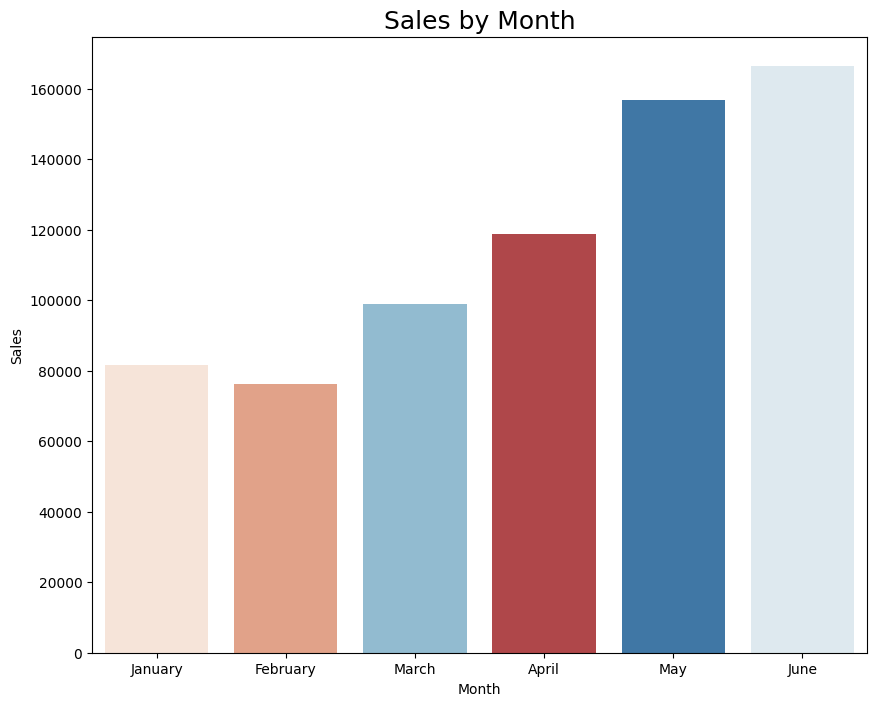

In [ ]:
plt.figure(figsize=(10, 8))
month_order = ['January', 'February', 'March', 'April', 'May', 'June']
sns.barplot(data = revenue, x = 'month', y = 'sales', hue = 'month', order = month_order, errorbar = None)
plt.title('Sales by Month', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### 0.6 Sales by Location

In [ ]:
# Sum of sales for each location
location_revenue = df.groupby('location')['sales'].sum().reset_index()
location_revenue

,location,sales
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


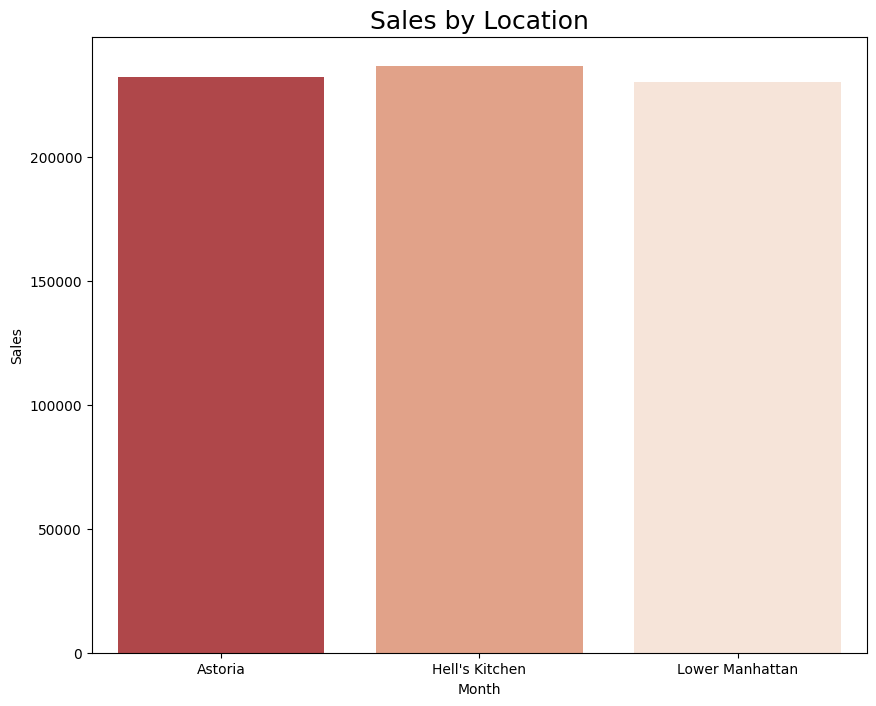

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data = location_revenue, x = 'location', y = 'sales', hue = 'location', errorbar = None)
plt.title('Sales by Location', fontsize = 18)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### 0.7 Top 10 Popular Product by Revenue

In [ ]:
product_revenue = df.groupby('product')['sales'].sum().reset_index()
product_revenue

,product,sales
0,Barista Espresso,91406.20
1,Biscotti,19793.53
2,Black tea,2711.85
3,Brewed Black tea,47932.00
4,Brewed Chai tea,77081.95
5,Brewed Green tea,23852.50
6,Brewed herbal tea,47539.50
7,Chai tea,4301.25
8,Clothing,6163.00
9,Drinking Chocolate,2728.04


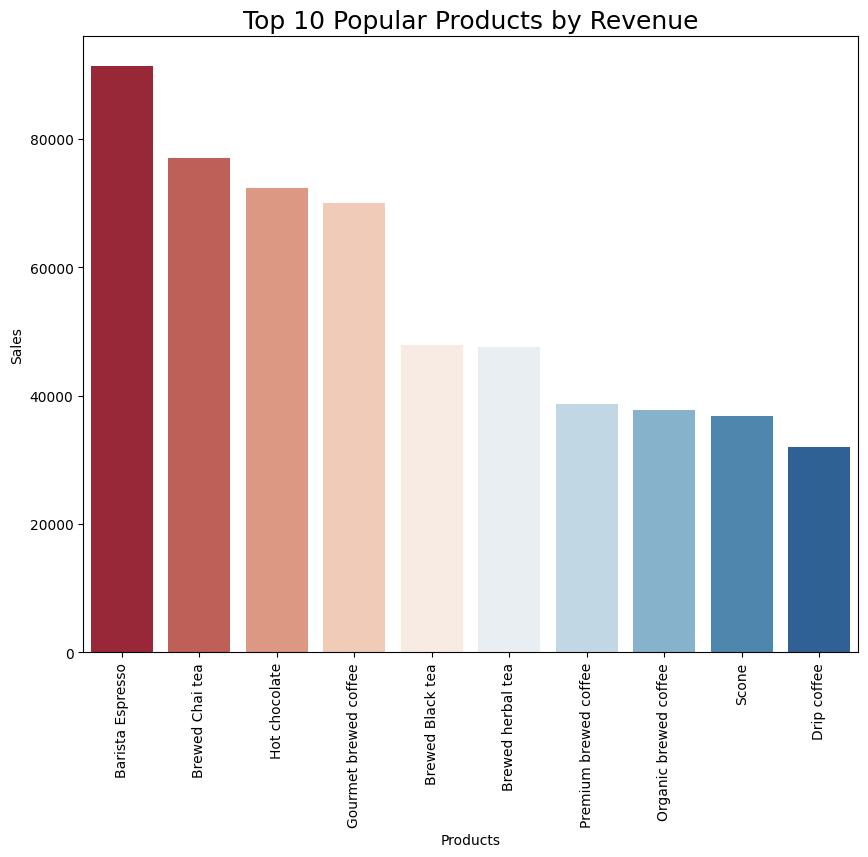

In [ ]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = 'product', y = 'sales', hue='product', palette='RdBu', data = product_revenue.sort_values('sales', ascending = False)[0:10])
# x-axis rotation
plt.xticks(rotation=90)
plt.title('Top 10 Popular Products by Revenue', fontsize = 18)
plt.xlabel('Products')
plt.ylabel('Sales')
plt.show()

### 0.8 Average Order Value (AOV) by Product Category

In [ ]:
category_aov = df.groupby('category')['sales'].mean().reset_index()
category_aov

,category,sales
0,Bakery,3.610969
1,Branded,18.215529
2,Coffee,4.621207
3,Coffee beans,22.866657
4,Drinking Chocolate,6.314615
5,Flavours,1.238409
6,Loose Tea,9.267438
7,Packaged Chocolate,9.050595
8,Tea,4.321458


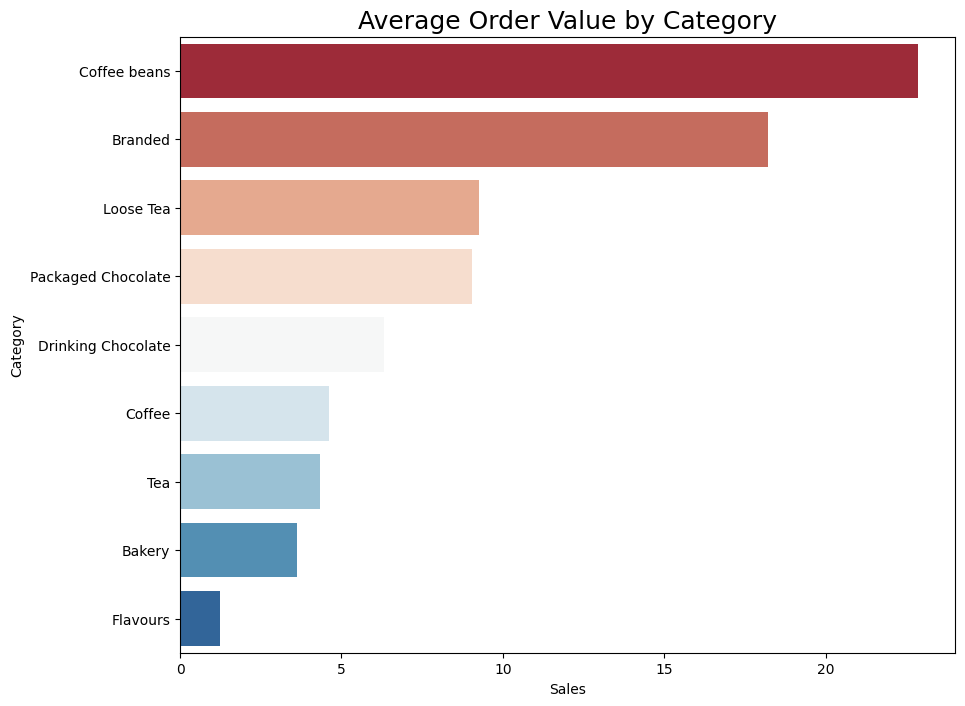

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'sales', y = 'category', hue = 'category', palette='RdBu', data = category_aov.sort_values('sales', ascending = False))
plt.title('Average Order Value by Category', fontsize = 18)
plt.xlabel('Sales')
plt.ylabel('Category')
plt.show()

### 0.9 Popular Category

In [ ]:
# count of category
category_count = df['category'].value_counts().reset_index()
category_count

,category,count
0,Coffee,58416
1,Tea,45449
2,Bakery,22796
3,Drinking Chocolate,11468
4,Flavours,6790
5,Coffee beans,1753
6,Loose Tea,1210
7,Branded,747
8,Packaged Chocolate,487


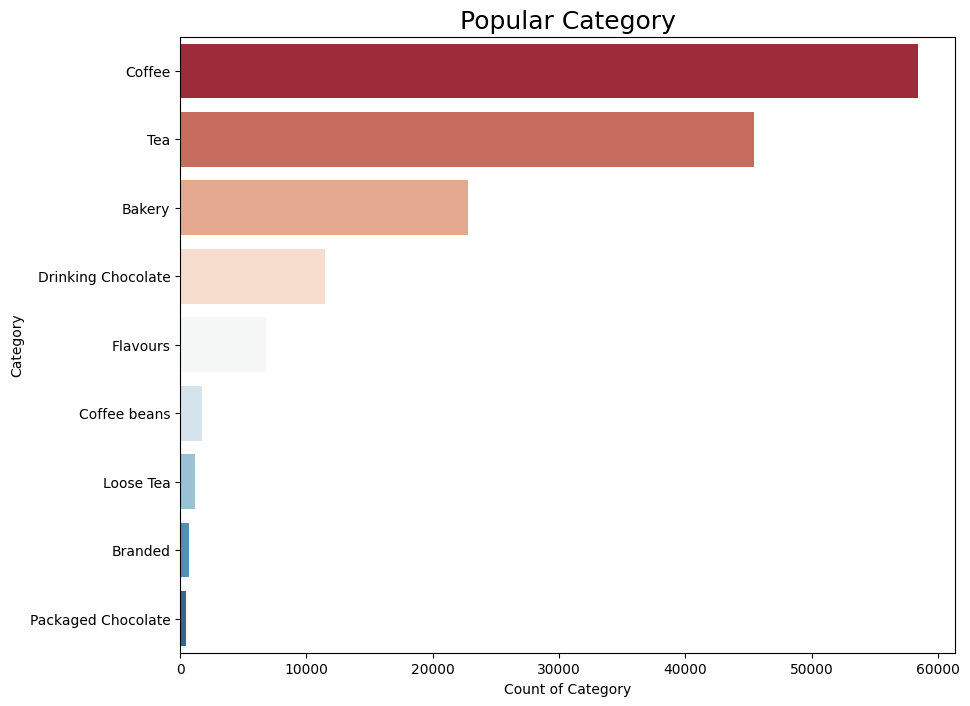

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(data = category_count, x = 'count', y = 'category', hue = 'category', palette='RdBu')
plt.title('Popular Category', fontsize = 18)
plt.xlabel('Count of Category')
plt.ylabel('Category')
plt.show()

### 0.10 Peak Hour

In [ ]:
order_per_hour = df.groupby('hour')['id'].count().reset_index()
order_per_hour

,hour,id
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


In [ ]:
# rename columns
order_per_hour.rename(columns = {'id':'count_of_orders'}, inplace = True)

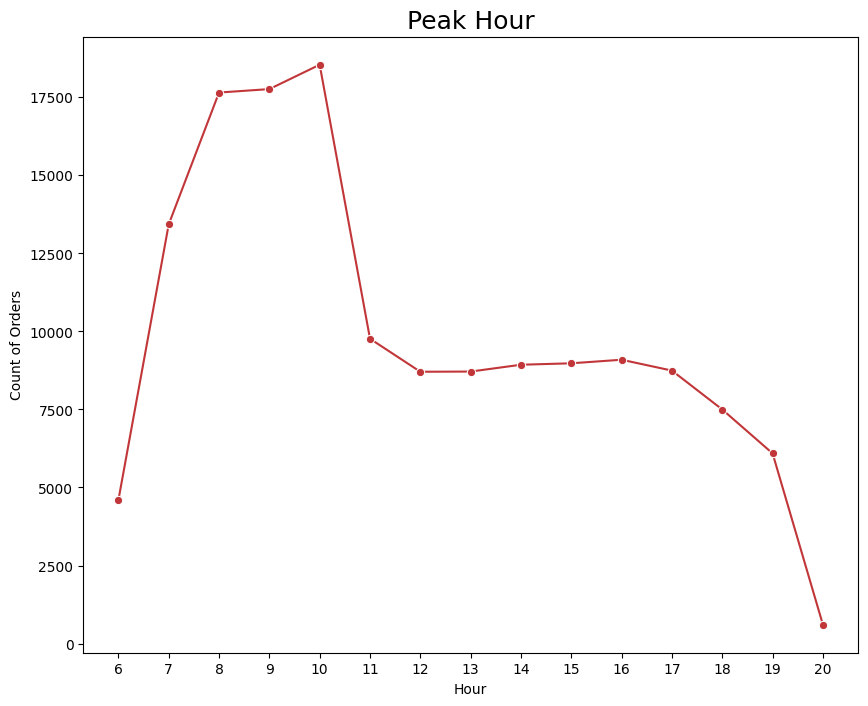

In [ ]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'hour', y = 'count_of_orders', data = order_per_hour, marker='o')
plt.xlabel('Hour')
plt.ylabel('Count of Orders')
plt.title('Peak Hour', fontsize = 18)
# Set the x-axis limits to the min and max values of 'hour'
plt.xticks(range(order_per_hour['hour'].min(), order_per_hour['hour'].max() + 1))
plt.show()

### 0.11 Peak Day

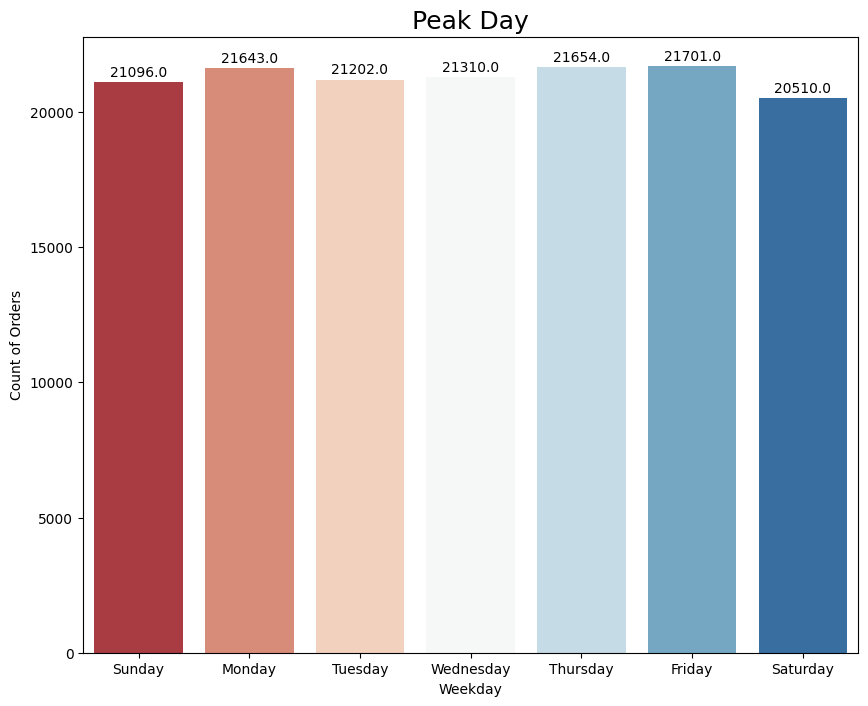

In [ ]:
plt.figure(figsize = (10, 8))
weekdays_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.countplot(x = 'weekday', data = df, hue = 'weekday', palette='RdBu', order = weekdays_order)

# Add count values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),   # x and y position of the text
                ha = 'center', va = 'center',
                xytext = (0, 7), textcoords='offset points')

plt.xlabel('Weekday')
plt.ylabel('Count of Orders')
plt.title('Peak Day', fontsize = 18)
plt.show()

### 0.12 Distribution of orders across different coffee types

In [ ]:
coffee_type = df[df['category'] == 'Coffee'][['product']]
coffee_type

,product
0,Gourmet brewed coffee
3,Drip coffee
6,Drip coffee
7,Gourmet brewed coffee
8,Barista Espresso
...,...
149103,Organic brewed coffee
149104,Premium brewed coffee
149105,Drip coffee
149106,Gourmet brewed coffee


In [ ]:
coffee_type_count = coffee_type['product'].value_counts().reset_index()
coffee_type_count

,product,count
0,Gourmet brewed coffee,16912
1,Barista Espresso,16403
2,Organic brewed coffee,8489
3,Drip coffee,8477
4,Premium brewed coffee,8135


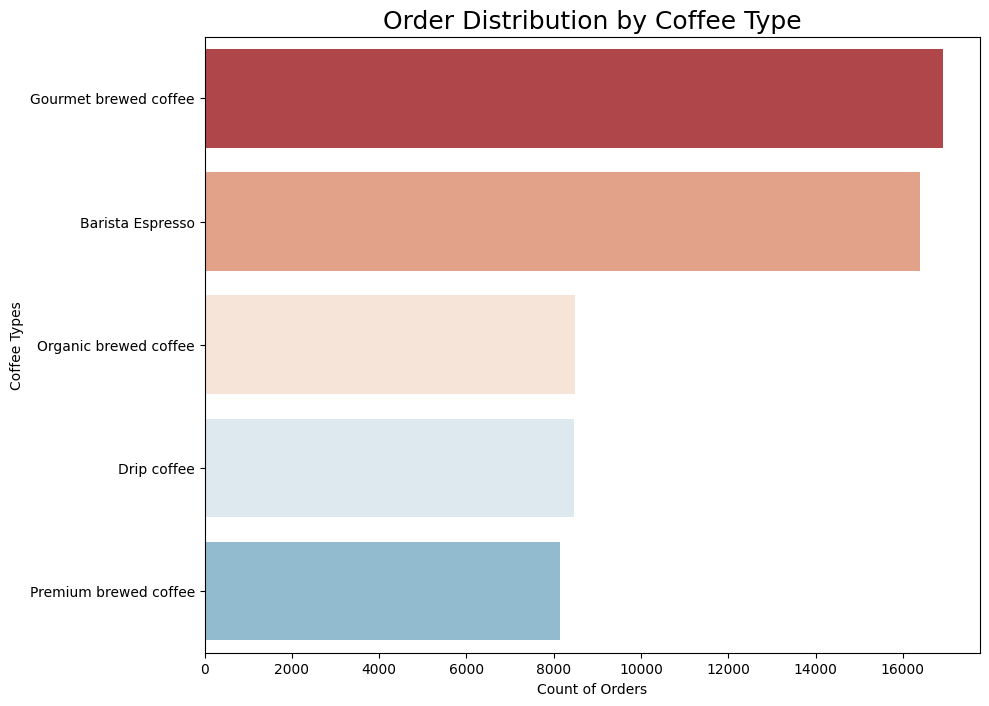

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(data = coffee_type_count, x = 'count', y = 'product', hue = 'product' )
plt.title('Order Distribution by Coffee Type', fontsize = 18)
plt.xlabel('Count of Orders')
plt.ylabel('Coffee Types')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime, store in 'Date'
df['Day'] = df['Date'].dt.day_name()     # Extract day name (e.g., Monday, Tuesday)
df['IsWeekend'] = df['Day'].isin(['Saturday', 'Sunday'])
weekend_sales = df[df['IsWeekend']]['sales'] # Access 'sales' for weekend sales
weekday_sales = df[~df['IsWeekend']]['sales'] # Access 'sales' for weekday sales

from scipy import stats
t_stat, p_val = stats.ttest_ind(weekend_sales, weekday_sales)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 0.3329996300858471, P-value: 0.7391350305470685


In [ ]:
import pandas as pd
from scipy import stats

# Load the data
df = pd.read_csv("Coffee Shop Sales.csv")  # Update with your file path

# Data cleaning and preprocessing
df.drop(columns=["store_id", "product_id"], inplace=True)
df.rename(
    columns={
        "transaction_id": "id",
        "transaction_date": "date",
        "transaction_time": "time",
        "transaction_qty": "quantity",
        "store_location": "location",
        "product_category": "category",
        "product_type": "product",
        "product_detail": "detail",
    },
    inplace=True,
)

# Convert 'date' column to datetime and create 'sales' column
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["sales"] = df["quantity"] * df["unit_price"]

# ... (Your other feature engineering code) ...

# Rename the existing 'date' column to 'Date'
df.rename(columns={'date': 'Date'}, inplace=True)

# Create 'Day' and 'IsWeekend' columns based on 'Date' column
df['Day'] = df['Date'].dt.day_name()
df['IsWeekend'] = df['Day'].isin(['Saturday', 'Sunday'])

# Access 'sales' for weekend and weekday sales
weekend_sales = df[df['IsWeekend']]['sales']
weekday_sales = df[~df['IsWeekend']]['sales']

# Perform the t-test
t_stat, p_val = stats.ttest_ind(weekend_sales, weekday_sales)

# Print the results
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Set significance level (alpha)
alpha = 0.05

# Hypothesis statement and interpretation
print("\nHypothesis Testing:")
print("Null Hypothesis (H0): There is no significant difference in sales between weekdays and weekends.")
print("Alternative Hypothesis (H1): There is a significant difference in sales between weekdays and weekends.")

if p_val < alpha:
    print(f"P-value ({p_val:.3f}) is less than alpha ({alpha}).")
    print("We reject the null hypothesis.")
    print("There is evidence to suggest a significant difference in sales between weekdays and weekends.")
else:
    print(f"P-value ({p_val:.3f}) is greater than or equal to alpha ({alpha}).")
    print("We fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest a significant difference in sales between weekdays and weekends.")

T-statistic: 0.3329996300858471, P-value: 0.7391350305470685

Hypothesis Testing:
Null Hypothesis (H0): There is no significant difference in sales between weekdays and weekends.
Alternative Hypothesis (H1): There is a significant difference in sales between weekdays and weekends.
P-value (0.739) is greater than or equal to alpha (0.05).
We fail to reject the null hypothesis.
There is not enough evidence to suggest a significant difference in sales between weekdays and weekends.


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'product' is the intended column for analysis
# Replace 'product' with the actual column name if different
anova_model = ols('sales ~ C(product)', data=df).fit()  # Changed 'Sales' to 'sales' and 'Item' to 'product'
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

                  sum_sq        df            F  PR(>F)
C(product)  1.137885e+06      28.0  3968.873354     0.0
Residual    1.526556e+06  149087.0          NaN     NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error



# Load the data
df = pd.read_csv("Coffee Shop Sales.csv")

# Data cleaning and preprocessing
df.drop(columns=["store_id", "product_id"], inplace=True)
df.rename(
    columns={
        "transaction_id": "id",
        "transaction_date": "date",
        "transaction_time": "time",
        "transaction_qty": "quantity",
        "store_location": "location",
        "product_category": "category",
        "product_type": "product",
        "product_detail": "detail",
    },
    inplace=True,
)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["sales"] = df["quantity"] * df["unit_price"]
df["month"] = df["date"].dt.strftime("%B")
df["day"] = df["date"].dt.day
df["year"] = df["date"].dt.year
df["weekday"] = df["date"].dt.day_name()
df["hour"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.hour

def get_time_of_day(hour):
    if hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"

df["time_of_day"] = df["hour"].apply(get_time_of_day)


# Statistical Analysis

# T-test for weekend vs weekday sales
df["Date"] = pd.to_datetime(df["date"])
df["Day"] = df["Date"].dt.day_name()
df["IsWeekend"] = df["Day"].isin(["Saturday", "Sunday"])
weekend_sales = df[df["IsWeekend"]]["sales"]
weekday_sales = df[~df["IsWeekend"]]["sales"]
t_stat, p_val = stats.ttest_ind(weekend_sales, weekday_sales)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# ANOVA for sales across different products
anova_model = ols("sales ~ C(product)", data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

# Linear Regression Model
# Convert categorical variables to dummies
df_encoded = pd.get_dummies(
    df, columns=["product", "weekday", "location"], drop_first=True
)  # Assuming 'product', 'weekday', and 'location' are the intended columns

# Drop the original 'date' and 'time' columns
# and any other irrelevant columns before defining features
X = df_encoded.drop(
    ["sales", "date", "time", 'Date', 'Day', 'IsWeekend', 'id', 'category', 'detail', 'quantity', 'unit_price', 'month', 'day', 'year', 'hour', 'time_of_day'], axis=1
)  # Assuming 'sales' is the target variable
y = df_encoded["sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2: {r2_score(y_test, y_pred):.2f}")
# Calculate RMSE manually using np.sqrt()
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

T-statistic: 0.3329996300858471, P-value: 0.7391350305470685
                  sum_sq        df            F  PR(>F)
C(product)  1.137885e+06      28.0  3968.873354     0.0
Residual    1.526556e+06  149087.0          NaN     NaN
R^2: 0.61
RMSE: 1.89


T-statistic: 0.3329996300858471, P-value: 0.7391350305470685
                  sum_sq        df            F  PR(>F)
C(product)  1.137885e+06      28.0  3968.873354     0.0
Residual    1.526556e+06  149087.0          NaN     NaN
R^2: 0.61
RMSE: 1.89


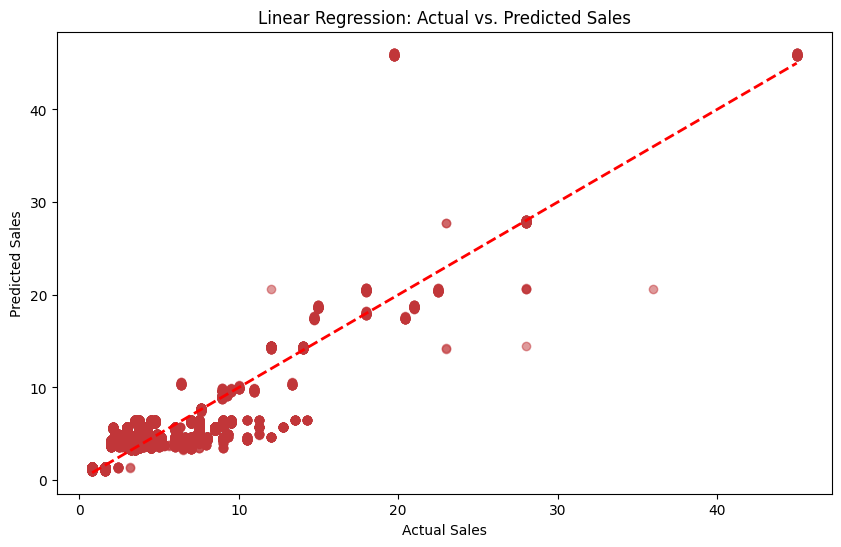

In [ ]:
!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the data
df = pd.read_csv("Coffee Shop Sales.csv")

# Data cleaning and preprocessing
df.drop(columns=["store_id", "product_id"], inplace=True)
df.rename(
    columns={
        "transaction_id": "id",
        "transaction_date": "date",
        "transaction_time": "time",
        "transaction_qty": "quantity",
        "store_location": "location",
        "product_category": "category",
        "product_type": "product",
        "product_detail": "detail",
    },
    inplace=True,
)
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["sales"] = df["quantity"] * df["unit_price"]
df["month"] = df["date"].dt.strftime("%B")
df["day"] = df["date"].dt.day
df["year"] = df["date"].dt.year
df["weekday"] = df["date"].dt.day_name()
df["hour"] = pd.to_datetime(df["time"], format="%H:%M:%S").dt.hour

def get_time_of_day(hour):
    if hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Evening"

df["time_of_day"] = df["hour"].apply(get_time_of_day)

# Statistical Analysis

# T-test for weekend vs weekday sales
df["Date"] = pd.to_datetime(df["date"])
df["Day"] = df["Date"].dt.day_name()
df["IsWeekend"] = df["Day"].isin(["Saturday", "Sunday"])
weekend_sales = df[df["IsWeekend"]]["sales"]
weekday_sales = df[~df["IsWeekend"]]["sales"]
t_stat, p_val = stats.ttest_ind(weekend_sales, weekday_sales)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# ANOVA for sales across different products
anova_model = ols("sales ~ C(product)", data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

# Linear Regression Model
# Convert categorical variables to dummies
df_encoded = pd.get_dummies(
    df, columns=["product", "weekday", "location"], drop_first=True
)  # Assuming 'product', 'weekday', and 'location' are the intended columns

# Drop the original 'date' and 'time' columns and other irrelevant columns
X = df_encoded.drop(
    ["sales", "date", "time", 'Date', 'Day', 'IsWeekend', 'id', 'category', 'detail', 'quantity', 'unit_price', 'month', 'day', 'year', 'hour', 'time_of_day'], axis=1
)  # Assuming 'sales' is the target variable
y = df_encoded["sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R^2: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# Plotting the Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs. Predicted Sales")
plt.show()